In [34]:
import pandas as pd

# Define file paths for data files
# These paths point to CSV files containing relevant data for analysis.
file_path = r"C:/Users/Guillermo Leal/OneDrive - IPADE Business School/PythonCodes/Project2 Data/postings.csv"
file_path2 = r"C:/Users/Guillermo Leal/OneDrive - IPADE Business School/PythonCodes/Project2 Data/company_industries.csv"
file_path3 = r"C:/Users/Guillermo Leal/OneDrive - IPADE Business School/PythonCodes/Project2 Data/States.csv"
file_path4 = r"C:/Users/Guillermo Leal/OneDrive - IPADE Business School/PythonCodes/Project2 Data/linkedin_mappings_Industry.csv"
file_path5 = r"C:/Users/Guillermo Leal/OneDrive - IPADE Business School/PythonCodes/Project2 Data/companies.csv"

# Load datasets into DataFrames
# Each file is read into a separate pandas DataFrame for analysis.
df = pd.read_csv(file_path)       # Job postings data
df2 = pd.read_csv(file_path2)     # Company ID - Industry mapping 
df3 = pd.read_csv(file_path3)     # States mapping data
df4 = pd.read_csv(file_path4)     # industries mapping data from Linkedin
df5 = pd.read_csv(file_path5)     # Company details



In [35]:
# Exchange rates to USD (2023 exchange rate), including USD itself which has a conversion rate of 1, 
exchange_rates = {
    'EUR': 0.93,
    'GBP': 0.79,
    'CAD': 1.35,
    'AUD': 1.5,
    'BBD': 2,
    'USD': 1  # Added rate for USD
}

# Calculate the 'Final salary' column
df['Final salary'] = df.apply(
    lambda row: (row['med_salary'] if pd.notnull(row['med_salary']) else
                 ((row['max_salary'] + row['min_salary']) / 2 if pd.notnull(row['max_salary']) and pd.notnull(row['min_salary']) else None)),
    axis=1
)

# Convert 'Final salary' to USD
df['Final salary'] = df.apply(
    lambda row: row['Final salary'] / exchange_rates.get(row['currency'], 1) if row['Final salary'] is not None else None,
    axis=1
)

# Preview the first 10 rows of relevant columns to verify the calculations
print(df[['max_salary', 'med_salary', 'min_salary', 'currency', 'Final salary']].head(10))



   max_salary  med_salary  min_salary currency  Final salary
0        20.0         NaN        17.0      USD          18.5
1        50.0         NaN        30.0      USD          40.0
2     65000.0         NaN     45000.0      USD       55000.0
3    175000.0         NaN    140000.0      USD      157500.0
4     80000.0         NaN     60000.0      USD       70000.0
5        20.0         NaN        14.0      USD          17.0
6    300000.0         NaN     60000.0      USD      180000.0
7    120000.0         NaN     90000.0      USD      105000.0
8         NaN         NaN         NaN      NaN           NaN
9         NaN       350.0         NaN      USD         350.0


In [36]:
# Count the number of non-null values in the 'Final salary' column
# This step identifies how many rows have a valid (non-null) value for 'Final salary'.
non_null_count = df['Final salary'].notnull().sum()

# Print the total count of non-null values
print(f"Number of non-null values in 'Final salary': {non_null_count}")

# Calculate the percentage of non-null values relative to the total number of rows
# This provides an overview of data completeness for the 'Final salary' column.
percentage_non_null = (non_null_count / len(df)) * 100

# Print the percentage of non-null values, formatted to two decimal places
print(f"Percentage of non-null values in 'Final salary': {percentage_non_null:.2f}%")


Number of non-null values in 'Final salary': 36073
Percentage of non-null values in 'Final salary': 29.13%


In [37]:
# Define conversion factors to calculate hourly wages based on different pay periods
# The factors convert annual, monthly, biweekly, and weekly salaries to hourly wages.
conversion_factors = {
    "HOURLY": 1,                # No conversion needed for hourly pay
    "YEARLY": 1 / (40 * 52),    # Convert yearly salary assuming 40 hours/week and 52 weeks/year
    "MONTHLY": 1 / (40 * 4),    # Convert monthly salary assuming 40 hours/week and 4 weeks/month
    "BIWEEKLY": 1 / 80,         # Convert biweekly salary assuming 80 hours per 2 weeks
    "WEEKLY": 1 / 40            # Convert weekly salary assuming 40 hours/week
}

# Calculate the "Final hourly salary" column
# Multiply the 'Final salary' by the appropriate conversion factor based on 'pay_period'.
# If 'pay_period' is missing from conversion_factors or 'Final salary' is null, assign None.
df['Final hourly salary'] = df.apply(
    lambda row: row['Final salary'] * conversion_factors[row['pay_period']]
    if row['pay_period'] in conversion_factors and pd.notnull(row['Final salary']) else None,
    axis=1
)

# Preview the first 5 rows of relevant columns to verify the calculations
print(df[['Final salary', 'pay_period', 'Final hourly salary']].head())



   Final salary pay_period  Final hourly salary
0          18.5     HOURLY            18.500000
1          40.0     HOURLY            40.000000
2       55000.0     YEARLY            26.442308
3      157500.0     YEARLY            75.721154
4       70000.0     YEARLY            33.653846


In [38]:
# Create a mapping dictionary to associate company_id with the state
# This dictionary maps each company_id from df5 to its corresponding state.
state_mapping = df5.set_index('company_id')['state'].to_dict()

# Map the 'State' column in df using the mapping dictionary
# Use the mapping to assign the state based on the 'company_id' in df.
# If a company_id is not found in the mapping, assign "NA" as a default value.
df['State'] = df['company_id'].map(state_mapping).fillna('NA')

# Preview the first 5 rows of 'company_id' and 'State' columns to verify the mapping
print(df[['company_id', 'State']].head())


   company_id     State
0   2774458.0        NJ
1         NaN        NA
2  64896719.0      Ohio
3    766262.0  New York
4         NaN        NA


In [39]:
# Create a mapping dictionary to associate 'State 1' with 'State 2'
# This dictionary maps state names in 'State 1' from df3 to their corresponding values in 'State 2'.
state_mapping2 = df3.set_index('State 1')['State 2'].to_dict()

# Map the 'US_States_W/wage' column in df using the mapping dictionary
# Use the 'State' column in df to find corresponding 'State 2' values from the mapping.
# If no match is found, assign "NA" as the default value.
df['US_States_W/wage'] = df['State'].map(state_mapping2).fillna('NA')

# Preview the first 5 rows of 'State' and 'US_States_W/wage' columns to verify the mapping
print(df[['State', 'US_States_W/wage']].head())


      State US_States_W/wage
0        NJ       New Jersey
1        NA               NA
2      Ohio             Ohio
3  New York         New York
4        NA               NA


In [40]:
# Group the data by 'US_States_W/wage' and calculate the average hourly salary for each state
# This aggregates the 'Final hourly salary' column, computing the mean for each unique state in 'US_States_W/wage'.
average_salary_by_state = df.groupby('US_States_W/wage')['Final hourly salary'].mean().reset_index()

# Rename columns for better readability
# Rename the resulting columns to reflect their content: state names and the average hourly salary.
average_salary_by_state.columns = ['US_States_W/wage', 'Average Hourly Salary']

# Display the DataFrame with the calculated averages for verification
print(average_salary_by_state)


        US_States_W/wage  Average Hourly Salary
0                Alabama              36.247274
1                 Alaska              58.202768
2                Arizona              36.827052
3               Arkansas              43.069187
4             California             223.150683
5               Colorado              45.762985
6            Connecticut             226.642400
7               Delaware              39.835377
8   District of Columbia             426.434141
9                Florida             132.789394
10               Georgia              42.062129
11                Hawaii              30.438636
12                 Idaho            1504.236065
13              Illinois              40.662239
14               Indiana              42.151183
15                  Iowa              47.281956
16                Kansas              34.151592
17              Kentucky              37.790212
18             Louisiana              32.534875
19                 Maine              41

In [41]:

# Define bins and labels for grouping hourly salaries
# Bins group 'Final hourly salary' into ranges (e.g., 100-200, 200-300, ..., >1000) to detect potential anomalies.
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]  # 'float('inf')' captures salaries >1000
labels = ['100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']

# Categorize 'Final hourly salary' into defined bins
# Use pd.cut to assign each salary to a bin and label it for better readability.
df['Salary Range'] = pd.cut(df['Final hourly salary'], bins=bins, labels=labels, right=False)

# Count the number of entries in each salary range
# Aggregate the data to see how many salaries fall into each bin and sort for logical order.
salary_counts = df['Salary Range'].value_counts().sort_index()

# Convert the results to a DataFrame for visualization
# Reset index and rename columns to create a clean, readable table of salary ranges and their counts.
salary_counts_df = salary_counts.reset_index()
salary_counts_df.columns = ['Salary Range', 'Count']

# Display the salary distribution table
print("Hourly Salary Distribution:")
print(salary_counts_df)

# Investigate bins with extreme counts
# High counts in unexpected bins (e.g., >1000) may indicate outliers or typos in the data.



Hourly Salary Distribution:
  Salary Range  Count
0      100-200   1403
1      200-300     91
2      300-400     21
3      400-500      6
4      500-600      1
5      600-700      2
6      700-800      2
7      800-900      0
8     900-1000      3
9        >1000     31


In [42]:
# Define conversion factors to normalize salaries based on pay periods
# Factors convert yearly, monthly, biweekly, and weekly salaries into hourly wages.
conversion_factors = {
    "HOURLY": 1,                # No conversion needed for hourly pay
    "YEARLY": 1 / (40 * 52),    # Convert yearly salary assuming 40 hours/week, 52 weeks/year
    "MONTHLY": 1 / (40 * 4),    # Convert monthly salary assuming 40 hours/week, 4 weeks/month
    "BIWEEKLY": 1 / 80,         # Convert biweekly salary assuming 80 hours/2 weeks
    "WEEKLY": 1 / 40            # Convert weekly salary assuming 40 hours/week
}

# Step 1: Calculate 'Final hourly salary' based on pay period and final salary
# Use the appropriate conversion factor for the given 'pay_period' if both it and 'Final salary' are valid.
df['Final hourly salary'] = df.apply(
    lambda row: row['Final salary'] * conversion_factors[row['pay_period']]
    if row['pay_period'] in conversion_factors and pd.notnull(row['Final salary']) else None,
    axis=1
)

# Step 2: Replace values greater than $500/hour with NaN
# Salaries exceeding $500/hour are likely outliers or errors. Replace them with None to exclude from analysis.
df['Final hourly salary'] = df['Final hourly salary'].apply(
    lambda x: x if x is not None and x <= 500 else None
)

# Preview the first few rows of the updated DataFrame to verify calculations and outlier handling
print("Updated DataFrame with Final Hourly Salary (Outliers Removed):")
print(df[['Final salary', 'pay_period', 'Final hourly salary']].head())



Updated DataFrame with Final Hourly Salary (Outliers Removed):
   Final salary pay_period  Final hourly salary
0          18.5     HOURLY            18.500000
1          40.0     HOURLY            40.000000
2       55000.0     YEARLY            26.442308
3      157500.0     YEARLY            75.721154
4       70000.0     YEARLY            33.653846


In [43]:
# Group data by 'US_States_W/wage' and calculate the average hourly salary
# This step computes the mean 'Final hourly salary' for each unique state in the 'US_States_W/wage' column.
average_salary_by_state = df.groupby('US_States_W/wage')['Final hourly salary'].mean().reset_index()

# Rename columns for clarity
# Update the column names to reflect their content: the state and the calculated average hourly salary.
average_salary_by_state.columns = ['US_States_W/wage', 'Average Hourly Salary']

# Display the resulting DataFrame
# This shows the average hourly salary (with the updated salaries) by state for verification or further analysis.
print(average_salary_by_state)


        US_States_W/wage  Average Hourly Salary
0                Alabama              36.247274
1                 Alaska              58.202768
2                Arizona              36.827052
3               Arkansas              43.069187
4             California              55.075794
5               Colorado              45.762985
6            Connecticut              43.660427
7               Delaware              39.835377
8   District of Columbia              49.892678
9                Florida              44.862241
10               Georgia              42.062129
11                Hawaii              30.438636
12                 Idaho              36.781201
13              Illinois              40.662239
14               Indiana              42.151183
15                  Iowa              47.281956
16                Kansas              34.151592
17              Kentucky              37.790212
18             Louisiana              32.534875
19                 Maine              41

In [44]:
"""
This code interacts with the Bureau of Labor Statistics (BLS) API to fetch 2023 hourly wage data 
for each U.S. state. The goal is to calculate and compile the average wage by state, 
allowing us to compare this data with other sources such as LinkedIn.
"""

import requests
import pandas as pd

# Define your BLS API Key
API_KEY = "b638de5903e3465aab6ad81ace6d0ee1"

# Map state names to BLS series IDs for hourly wage data
state_series_ids = {
    "Alabama": "SMU01000000500000003",
    "Alaska": "SMU02000000500000003",
    "Arizona": "SMU04000000500000003",
    "Arkansas": "SMU05000000500000003",
    "California": "SMU06000000500000003",
    "Colorado": "SMU08000000500000003",
    "Connecticut": "SMU09000000500000003",
    "Delaware": "SMU10000000500000003",
    "District of Columbia": "SMU11000000500000003",
    "Florida": "SMU12000000500000003",
    "Georgia": "SMU13000000500000003",
    "Hawaii": "SMU15000000500000003",
    "Idaho": "SMU16000000500000003",
    "Illinois": "SMU17000000500000003",
    "Indiana": "SMU18000000500000003",
    "Iowa": "SMU19000000500000003",
    "Kansas": "SMU20000000500000003",
    "Kentucky": "SMU21000000500000003",
    "Louisiana": "SMU22000000500000003",
    "Maine": "SMU23000000500000003",
    "Maryland": "SMU24000000500000003",
    "Massachusetts": "SMU25000000500000003",
    "Michigan": "SMU26000000500000003",
    "Minnesota": "SMU27000000500000003",
    "Mississippi": "SMU28000000500000003",
    "Missouri": "SMU29000000500000003",
    "Montana": "SMU30000000500000003",
    "Nebraska": "SMU31000000500000003",
    "Nevada": "SMU32000000500000003",
    "New Hampshire": "SMU33000000500000003",
    "New Jersey": "SMU34000000500000003",
    "New Mexico": "SMU35000000500000003",
    "New York": "SMU36000000500000003",
    "North Carolina": "SMU37000000500000003",
    "North Dakota": "SMU38000000500000003",
    "Ohio": "SMU39000000500000003",
    "Oklahoma": "SMU40000000500000003",
    "Oregon": "SMU41000000500000003",
    "Pennsylvania": "SMU42000000500000003",
    "Rhode Island": "SMU44000000500000003",
    "South Carolina": "SMU45000000500000003",
    "South Dakota": "SMU46000000500000003",
    "Tennessee": "SMU47000000500000003",
    "Texas": "SMU48000000500000003",
    "Utah": "SMU49000000500000003",
    "Vermont": "SMU50000000500000003",
    "Virginia": "SMU51000000500000003",
    "Washington": "SMU53000000500000003",
    "West Virginia": "SMU54000000500000003",
    "Wisconsin": "SMU55000000500000003",
    "Wyoming": "SMU56000000500000003"
}

# Fetch wage data for a specific state in 2023
def fetch_wages_2023(state_name, series_id):
    params = {
        "seriesid": [series_id],
        "startyear": "2023",
        "endyear": "2023",
        "registrationkey": API_KEY
    }
    response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=params)
    if response.status_code == 200:
        data = response.json()
        if 'Results' in data and 'series' in data['Results']:
            # Extract hourly wage for 2023
            for entry in data['Results']['series'][0]['data']:
                if entry["year"] == "2023":
                    return float(entry["value"])
    return None

# Fetch wages for all states
wages_2023 = {state: fetch_wages_2023(state, series_id) for state, series_id in state_series_ids.items()}

# Convert wage data into a DataFrame
df_wages_2023 = pd.DataFrame(list(wages_2023.items()), columns=["State", "Hourly Wage 2023"])

# Display the DataFrame with average hourly wages by state
print("Average Hourly Wages by State (2023, BLS Data):")
print(df_wages_2023)


Average Hourly Wages by State (2023, BLS Data):
                   State  Hourly Wage 2023
0                Alabama             30.09
1                 Alaska             35.52
2                Arizona             31.94
3               Arkansas             27.92
4             California             38.42
5               Colorado             36.94
6            Connecticut             36.93
7               Delaware             31.50
8   District of Columbia             51.06
9                Florida             31.92
10               Georgia             30.91
11                Hawaii             36.17
12                 Idaho             31.08
13              Illinois             33.65
14               Indiana             29.81
15                  Iowa             28.98
16                Kansas             29.58
17              Kentucky             28.60
18             Louisiana             27.89
19                 Maine             31.16
20              Maryland             34.84
21    

In [45]:
# Merge LinkedIn and BLS DataFrames on the "State" column
# Combine LinkedIn and BLS hourly wage data for comparison, aligning on state names.
comparison_df = pd.merge(df_wages_2023, average_salary_by_state, left_on="State", right_on="US_States_W/wage")

# Calculate the absolute and percentage differences in wages
# 'Difference (Units)' computes LinkedIn - BLS for hourly wages.
comparison_df["Difference (Units)"] = comparison_df["Average Hourly Salary"] - comparison_df["Hourly Wage 2023"]
# 'Difference (%)' calculates the percentage difference relative to BLS wages.
comparison_df["Difference (%)"] = (comparison_df["Difference (Units)"] / comparison_df["Hourly Wage 2023"]) * 100

# Format numeric columns for readability
# Convert all monetary and percentage values into a more readable format.
comparison_df["LinkedIn"] = comparison_df["Average Hourly Salary"].apply(lambda x: f"{x:,.2f}")
comparison_df["BLS"] = comparison_df["Hourly Wage 2023"].apply(lambda x: f"{x:,.2f}")
comparison_df["Difference (Units)"] = comparison_df["Difference (Units)"].apply(lambda x: f"{x:,.2f}")
comparison_df["Difference (%)"] = comparison_df["Difference (%)"].apply(lambda x: f"{x:,.2f}%")

# Select and display relevant columns
# Keep only columns relevant for comparison and present the final DataFrame.
comparison_df = comparison_df[["State", "LinkedIn", "BLS", "Difference (Units)", "Difference (%)"]]

# Display the comparison results
print("Comparison of Average Hourly Wages by State (LinkedIn vs. BLS):")
comparison_df


Comparison of Average Hourly Wages by State (LinkedIn vs. BLS):


,State,LinkedIn,BLS,Difference (Units),Difference (%)
0,Alabama,36.25,30.09,6.16,20.46%
1,Alaska,58.20,35.52,22.68,63.86%
2,Arizona,36.83,31.94,4.89,15.30%
3,Arkansas,43.07,27.92,15.15,54.26%
4,California,55.08,38.42,16.66,43.35%
5,Colorado,45.76,36.94,8.82,23.88%
6,Connecticut,43.66,36.93,6.73,18.22%
7,Delaware,39.84,31.50,8.34,26.46%
8,District of Columbia,49.89,51.06,-1.17,-2.29%
9,Florida,44.86,31.92,12.94,40.55%


In [46]:
# Calculate national averages for LinkedIn and BLS hourly wages
# Compute the mean hourly wage across all states for both LinkedIn and BLS datasets.
national_linkedin_avg = comparison_df["LinkedIn"].astype(float).mean()  # Convert formatted strings to floats
national_bls_avg = comparison_df["BLS"].astype(float).mean()

# Calculate absolute and percentage differences
# 'Difference (Units)' is the difference between LinkedIn and BLS averages.
difference_units = national_linkedin_avg - national_bls_avg
# 'Difference (%)' calculates the percentage difference relative to BLS wages.
difference_percentage = (difference_units / national_bls_avg) * 100

# Display the national-level comparison results
print(f"National LinkedIn Average Hourly Salary: ${national_linkedin_avg:,.2f}")
print(f"National BLS Average Hourly Salary: ${national_bls_avg:,.2f}")
print(f"Difference (Units): ${difference_units:,.2f}")
print(f"Difference (%): {difference_percentage:,.2f}%")


National LinkedIn Average Hourly Salary: $40.79
National BLS Average Hourly Salary: $32.75
Difference (Units): $8.04
Difference (%): 24.56%


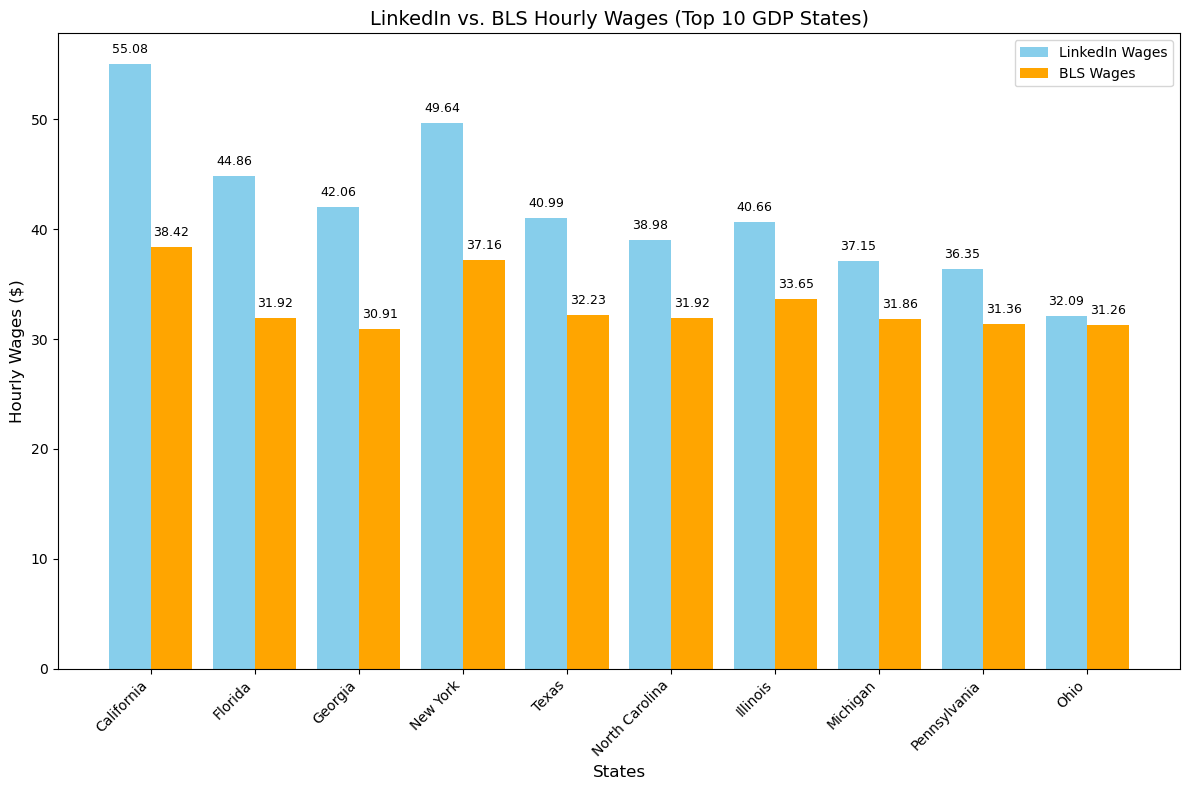

In [47]:
import matplotlib.pyplot as plt


# Ensure numeric conversion for relevant columns
comparison_df["Difference (Units)"] = pd.to_numeric(comparison_df["Difference (Units)"], errors="coerce")
comparison_df["Difference (%)"] = pd.to_numeric(comparison_df["Difference (%)"].replace("%", "", regex=True), errors="coerce")
comparison_df["LinkedIn"] = pd.to_numeric(comparison_df["LinkedIn"], errors="coerce")
comparison_df["BLS"] = pd.to_numeric(comparison_df["BLS"], errors="coerce")

# Define the 10 most economically important states based on GDP
top_10_states_list = [
    "California", "Texas", "New York", "Florida", 
    "Illinois", "Pennsylvania", "Ohio", "Georgia", 
    "North Carolina", "Michigan"
]

# Filter the DataFrame to include only the top 10 GDP states
top_10_states = comparison_df[comparison_df["State"].isin(top_10_states_list)]

# Sort the states by the percentage difference for a clear visual order
top_10_states = top_10_states.sort_values("Difference (%)", ascending=False)

# Assign variables for plotting
states = top_10_states["State"]
linkedin_wages = top_10_states["LinkedIn"]
bls_wages = top_10_states["BLS"]
percentage_differences = top_10_states["Difference (%)"]

# Create the column graph
x_indexes = range(len(states))  # Index positions for the x-axis
bar_width = 0.4  # Width of the bars

plt.figure(figsize=(12, 8))

# Plot LinkedIn and BLS wages side-by-side for comparison
bars1 = plt.bar(x_indexes, linkedin_wages, width=bar_width, label="LinkedIn Wages", color="skyblue")
bars2 = plt.bar([x + bar_width for x in x_indexes], bls_wages, width=bar_width, label="BLS Wages", color="orange")

# Add data labels to the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{bar.get_height():.2f}", ha="center", fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{bar.get_height():.2f}", ha="center", fontsize=9)

# Add state labels to the x-axis
plt.xticks([x + bar_width / 2 for x in x_indexes], states, rotation=45, ha="right", fontsize=10)

# Add titles and labels
plt.title("LinkedIn vs. BLS Hourly Wages (Top 10 GDP States)", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Hourly Wages ($)", fontsize=12)

# Add a legend to distinguish between LinkedIn and BLS wages
plt.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.savefig("linkedin_vs_blsBarChart.jpg", bbox_inches="tight")
plt.show()


In [48]:
#Code for Industries avg hourly wage

In [49]:

# BLS API Key
API_KEY = "b638de5903e3465aab6ad81ace6d0ee1"

# Define the series IDs for each industry
industry_series_ids = {
    "Construction and Building": "CEU2000000003",
    "General Manufacturing": "CEU3000000003",
    "Manufacturing and Retail Trade": "CEU4200000003",
    "Transportation and Warehousing": "CEU4300000003",
    "Education and Training Services": "CEU6500000003",
    "Professional and Business Services": "CEU6000000003",
    "Performing Arts and Sports": "CEU7000000003"
}

# Define the year to query (2023 only)
query_year = "2023"

# Set up the BLS API endpoint and headers
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# Function to fetch data for a specific industry
def fetch_industry_data(industry_name, series_id):
    params = {
        "seriesid": [series_id],
        "startyear": query_year,
        "endyear": query_year,
        "registrationkey": API_KEY
    }

    # Make the API request
    response = requests.post(url, headers=headers, json=params)

    # Check response and parse data if successful
    if response.status_code == 200:
        data = response.json()
        
        # Process data for the specific year
        try:
            for entry in data['Results']['series'][0]['data']:
                if entry["year"] == query_year and "value" in entry:
                    hourly_wage = float(entry["value"])
                    return hourly_wage
        except KeyError:
            print(f"Unexpected response structure for {industry_name}.")
    else:
        print(f"Error for {industry_name}: {response.status_code}, {response.text}")
    return None

# Initialize a dictionary to store results
industry_wages = {}

# Fetch data for each industry
for industry_name, series_id in industry_series_ids.items():
    wage = fetch_industry_data(industry_name, series_id)
    if wage is not None:
        industry_wages[industry_name] = wage

# Convert the results into a DataFrame
industry_wages_df = pd.DataFrame(list(industry_wages.items()), columns=["Industry", "Hourly Wage (2023)"])

# Display the consolidated DataFrame
print(industry_wages_df)


                             Industry  Hourly Wage (2023)
0           Construction and Building               37.45
1               General Manufacturing               33.30
2      Manufacturing and Retail Trade               23.75
3      Transportation and Warehousing               29.80
4     Education and Training Services               33.75
5  Professional and Business Services               41.11
6          Performing Arts and Sports               21.84


In [50]:
# Map 'LinkedIn Industry Name' to 'Cluster Name' from df4
# Merge df4 with df2 on industry and add Cluster Name to df2
df2['Cluster Name'] = df2['industry'].map(
    df4.set_index('LinkedIn Industry Name')['Cluster Name']
)

In [52]:
# Ensure 'company_id' in df2 is unique by taking the first occurrence
df2_unique = df2.drop_duplicates(subset='company_id', keep='first')

# Safely map 'company_id' in df to 'Cluster Name' in df2
df['Business Cluster'] = df['company_id'].map(
    df2_unique.set_index('company_id')['Cluster Name']
).fillna('Unknown')  # Handle missing mappings

In [53]:
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,compensation_type,normalized_salary,zip_code,fips,Final salary,Final hourly salary,State,US_States_W/wage,Salary Range,Business Cluster
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,BASE_SALARY,38480.0,8540.0,34021.0,18.5,18.500000,NJ,New Jersey,NaN,Real Estate and Office Services
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,BASE_SALARY,83200.0,80521.0,8069.0,40.0,40.000000,NA,NA,NaN,Unknown
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,BASE_SALARY,55000.0,45202.0,39061.0,55000.0,26.442308,Ohio,Ohio,NaN,Food and Beverage Industries
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,BASE_SALARY,157500.0,11040.0,36059.0,157500.0,75.721154,New York,New York,NaN,Professional and Business Services
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,BASE_SALARY,70000.0,52601.0,19057.0,70000.0,33.653846,NA,NA,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,BASE_SALARY,157500.0,94595.0,6013.0,157500.0,75.721154,California,California,NaN,Professional and Business Services
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,Automotive Industry
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,NaN,99201.0,53063.0,NaN,NaN,MD,Maryland,NaN,Education and Training Services
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lancashire,NA,NaN,Equipment and Machinery Manufacturing


In [54]:
# List of industries to calculate the average hourly wage
target_industries = [
    "Construction and Building",
    "General Manufacturing",
    "Manufacturing and Retail Trade",
    "Transportation and Warehousing",
    "Education and Training Services",
    "Professional and Business Services",
    "Performing Arts and Sports"
]

# Filter the DataFrame to include only the target industries
filtered_df = df[df['Business Cluster'].isin(target_industries)]

# Calculate the average hourly wage by industry
average_wages = filtered_df.groupby('Business Cluster')['Final hourly salary'].mean().reset_index()

# Rename columns for better clarity
average_wages.columns = ['Industry', 'Average Hourly Wage']

# Display the result
print("Average Hourly Wage by Industry:")
print(average_wages)

Average Hourly Wage by Industry:
                             Industry  Average Hourly Wage
0           Construction and Building            46.671432
1     Education and Training Services            48.289371
2               General Manufacturing            47.621348
3      Manufacturing and Retail Trade            26.317452
4          Performing Arts and Sports            44.523375
5  Professional and Business Services            53.401998
6      Transportation and Warehousing            28.594827


In [58]:
# Merge `df` and `industry_wages_df` on the "Business Cluster" column
# Aligns the calculated industry wages from `df` with the API results in `industry_wages_df`
comparison_df = pd.merge(
    df.groupby('Business Cluster')['Final hourly salary'].mean().reset_index().rename(columns={'Final hourly salary': 'Calculated Average Hourly Wage'}),
    industry_wages_df.rename(columns={'Industry': 'Business Cluster', 'Hourly Wage (2023)': 'API Hourly Wage'}),
    on='Business Cluster',
    how='inner'  # Ensure only matching industries are compared
)

# Calculate the absolute and percentage differences in wages
comparison_df["Difference (Units)"] = comparison_df["Calculated Average Hourly Wage"] - comparison_df["API Hourly Wage"]
comparison_df["Difference (%)"] = (comparison_df["Difference (Units)"] / comparison_df["API Hourly Wage"]) * 100

# Format numeric columns for readability
comparison_df["LinkedIn"] = comparison_df["Calculated Average Hourly Wage"].apply(lambda x: f"{x:,.2f}")
comparison_df["BLS"] = comparison_df["API Hourly Wage"].apply(lambda x: f"{x:,.2f}")
comparison_df["Difference (Units)"] = comparison_df["Difference (Units)"].apply(lambda x: f"{x:,.2f}")
comparison_df["Difference (%)"] = comparison_df["Difference (%)"].apply(lambda x: f"{x:,.2f}%")

# Select and display relevant columns
comparison_df = comparison_df[["Business Cluster", "LinkedIn", "BLS", "Difference (Units)", "Difference (%)"]]

# Display the comparison results
print("Comparison of Average Hourly Wages by Industry (Calculated vs. API):")
comparison_df

Comparison of Average Hourly Wages by Industry (Calculated vs. API):


,Business Cluster,LinkedIn,BLS,Difference (Units),Difference (%)
0,Construction and Building,46.67,37.45,9.22,24.62%
1,Education and Training Services,48.29,33.75,14.54,43.08%
2,General Manufacturing,47.62,33.30,14.32,43.01%
3,Manufacturing and Retail Trade,26.32,23.75,2.57,10.81%
4,Performing Arts and Sports,44.52,21.84,22.68,103.86%
5,Professional and Business Services,53.40,41.11,12.29,29.90%
6,Transportation and Warehousing,28.59,29.80,-1.21,-4.04%


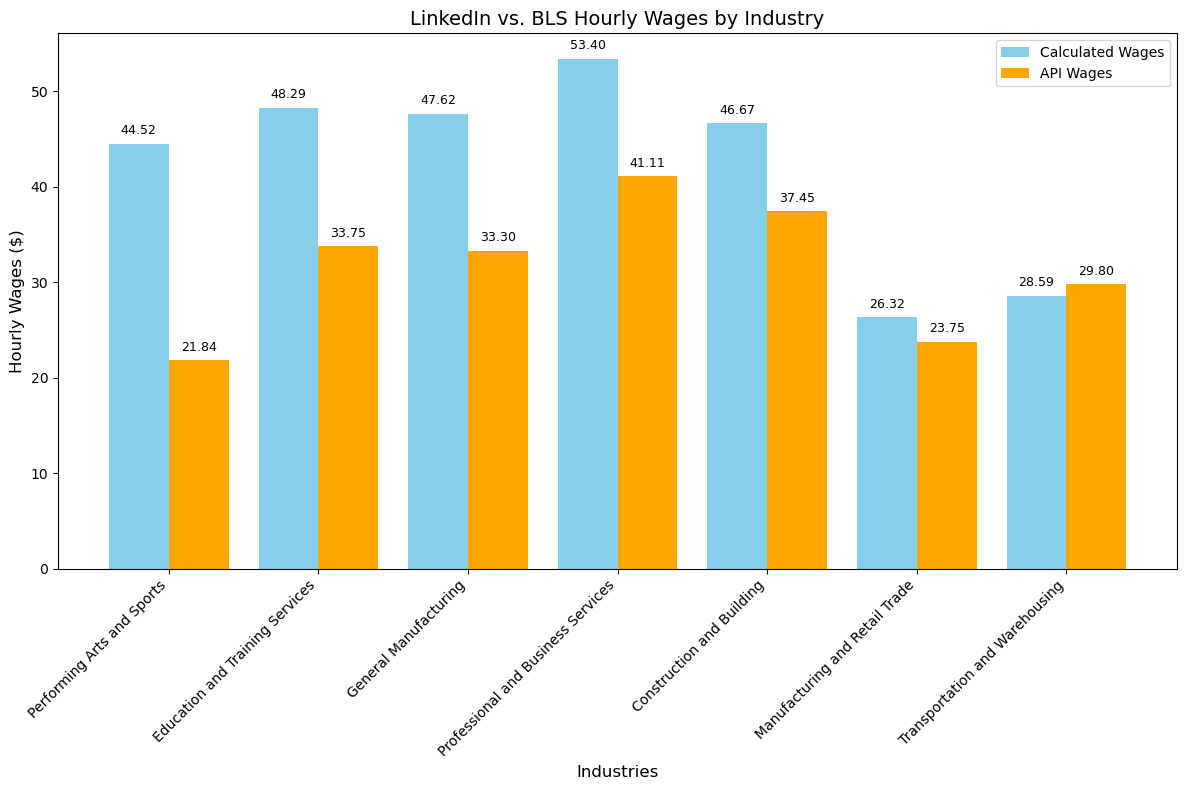

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric conversion for relevant columns
comparison_df["Difference (Units)"] = pd.to_numeric(comparison_df["Difference (Units)"].str.replace(",", ""), errors="coerce")
comparison_df["Difference (%)"] = pd.to_numeric(comparison_df["Difference (%)"].str.replace("%", ""), errors="coerce")
comparison_df["LinkedIn"] = pd.to_numeric(comparison_df["LinkedIn"].str.replace(",", ""), errors="coerce")
comparison_df["BLS"] = pd.to_numeric(comparison_df["BLS"].str.replace(",", ""), errors="coerce")

# Sort industries by the percentage difference for a clear visual order
comparison_df_sorted = comparison_df.sort_values("Difference (%)", ascending=False)

# Assign variables for plotting
industries = comparison_df_sorted["Business Cluster"]
calculated_wages = comparison_df_sorted["LinkedIn"]
api_wages = comparison_df_sorted["BLS"]

# Create the column graph
x_indexes = range(len(industries))  # Index positions for the x-axis
bar_width = 0.4  # Width of the bars

plt.figure(figsize=(12, 8))

# Plot Calculated and API wages side-by-side for comparison
bars1 = plt.bar(x_indexes, calculated_wages, width=bar_width, label="Calculated Wages", color="skyblue")
bars2 = plt.bar([x + bar_width for x in x_indexes], api_wages, width=bar_width, label="API Wages", color="orange")

# Add data labels to the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{bar.get_height():.2f}", ha="center", fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{bar.get_height():.2f}", ha="center", fontsize=9)

# Add industry labels to the x-axis
plt.xticks([x + bar_width / 2 for x in x_indexes], industries, rotation=45, ha="right", fontsize=10)

# Add titles and labels
plt.title("LinkedIn vs. BLS Hourly Wages by Industry", fontsize=14)
plt.xlabel("Industries", fontsize=12)
plt.ylabel("Hourly Wages ($)", fontsize=12)

# Add a legend to distinguish between Calculated and API wages
plt.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.savefig("calculated_vs_apiBarChart.jpg", bbox_inches="tight")
plt.show()
